In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
df_train.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df_train_dummies = pd.get_dummies(df_train, columns = ['Sex'])
df_train_dummies = pd.get_dummies(df_train_dummies, columns = ['Embarked'])
df_train_dummies.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,1,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,1,0,0,0,1


<AxesSubplot:>

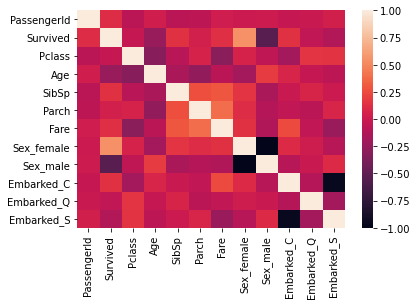

In [14]:
sns.heatmap(df_train_dummies.corr())

In [15]:
used_feautures = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df_train_dummies[used_feautures].values
y = df_train_dummies['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(141, 9)

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\mahes\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
metrics.confusion_matrix(y_test, y_pred)

array([[14, 11],
       [ 5, 31]], dtype=int64)

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.7377049180327869

In [21]:
len(X_test)

61

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64        25
           1       0.74      0.86      0.79        36

    accuracy                           0.74        61
   macro avg       0.74      0.71      0.72        61
weighted avg       0.74      0.74      0.73        61



In [23]:
lr.coef_

array([[-0.47466848, -0.04889023,  0.1180089 , -0.00338312,  1.53330585,
        -1.40180776,  0.5726193 , -0.45784753,  0.01672631]])

In [24]:
lr.intercept_

array([3.72706443])

In [25]:
lr.predict_proba(X_test)

array([[0.45490189, 0.54509811],
       [0.88426074, 0.11573926],
       [0.35837325, 0.64162675],
       [0.56545806, 0.43454194],
       [0.11639811, 0.88360189],
       [0.02124834, 0.97875166],
       [0.21000201, 0.78999799],
       [0.46383   , 0.53617   ],
       [0.02609586, 0.97390414],
       [0.13273694, 0.86726306],
       [0.07461367, 0.92538633],
       [0.02460249, 0.97539751],
       [0.5276667 , 0.4723333 ],
       [0.68528395, 0.31471605],
       [0.51542628, 0.48457372],
       [0.19033547, 0.80966453],
       [0.06723438, 0.93276562],
       [0.25267739, 0.74732261],
       [0.52340442, 0.47659558],
       [0.48541011, 0.51458989],
       [0.49541699, 0.50458301],
       [0.05720658, 0.94279342],
       [0.04693138, 0.95306862],
       [0.61552327, 0.38447673],
       [0.07650208, 0.92349792],
       [0.61770263, 0.38229737],
       [0.08885982, 0.91114018],
       [0.73521066, 0.26478934],
       [0.50739572, 0.49260428],
       [0.41030089, 0.58969911],
       [0.